# Decision Trees - Classfication

## The Data

I will work with the "Palmer Penguins" dataset to understand how changing hyperparameters can change classification results.

Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

Gorman KB, Williams TD, Fraser WR (2014) Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PLoS ONE 9(3): e90081. doi:10.1371/journal.pone.0090081

Summary:
The data folder contains two CSV files. For intro courses/examples, you probably want to use the first one (penguins_size.csv).

* penguins_size.csv: Simplified data from original penguin data sets. Contains variables:

    * species: penguin species (Chinstrap, Adélie, or Gentoo)
    * culmen_length_mm: culmen length (mm)
    * culmen_depth_mm: culmen depth (mm)
    * flipper_length_mm: flipper length (mm)
    * body_mass_g: body mass (g)
    * island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
    * sex: penguin sex

* (Not used) penguins_lter.csv: Original combined data for 3 penguin species  

Note: The culmen is "the upper ridge of a bird's beak" 

**The goal is to create a model that can help predict a species of a penguin based on physical attributes, then the model can help researchers classify penguins in the field, instead of needing an experienced biologist**

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../DATA/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## EDA

### Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
# What percentage are we dropping?
100*(10/344)

2.9069767441860463

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [10]:
df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [11]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [12]:
df = df[df['sex']!='.']

## Visualization

<AxesSubplot:xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

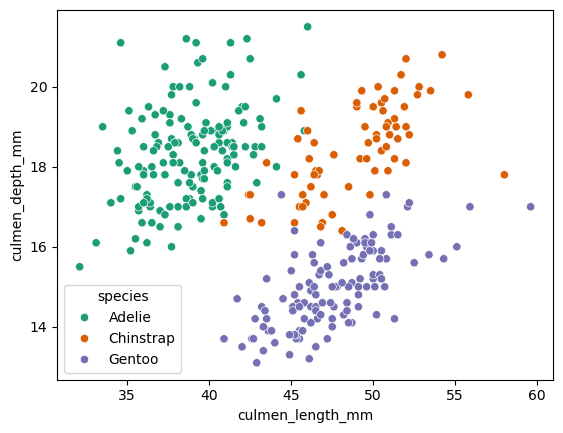

In [13]:
sns.scatterplot(x='culmen_length_mm',y='culmen_depth_mm',data=df,hue='species',palette='Dark2')

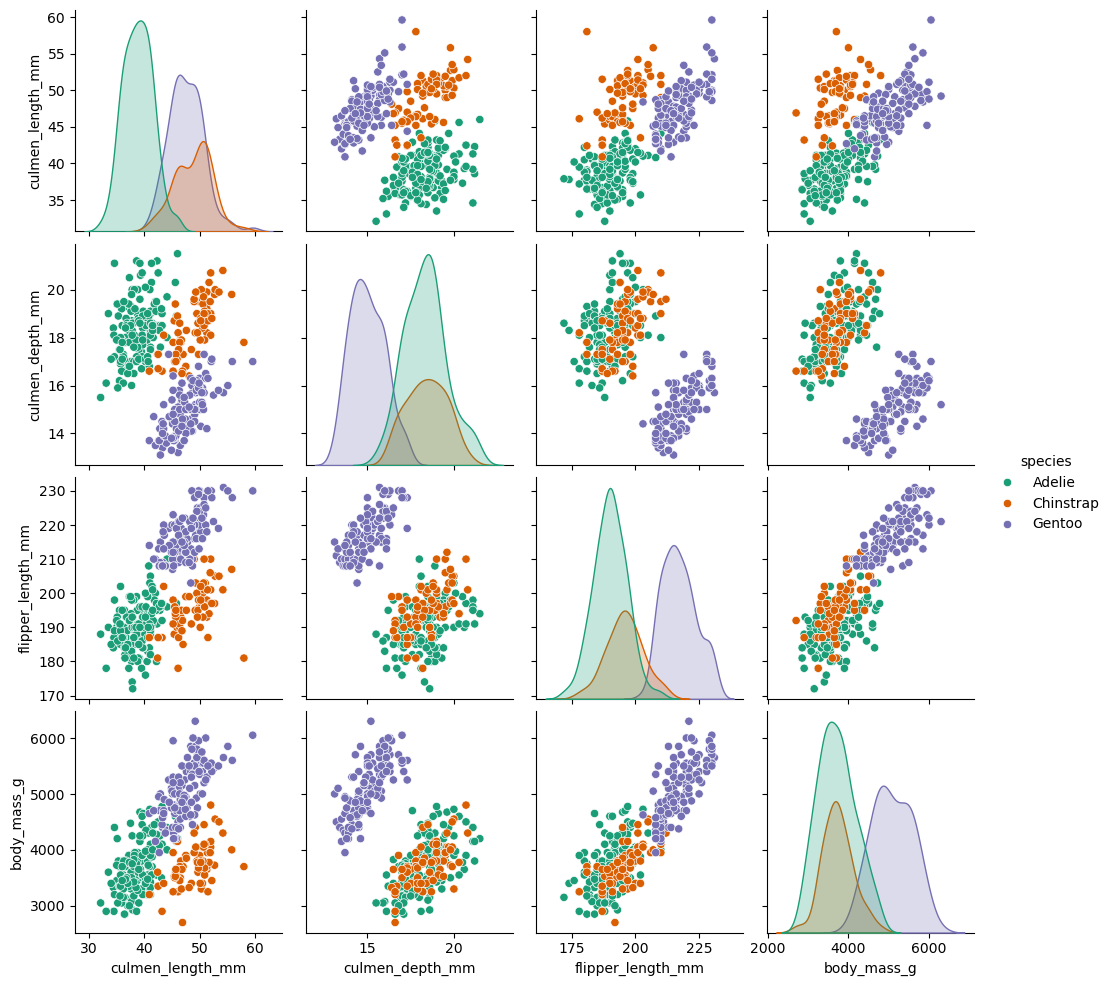

In [14]:
sns.pairplot(df,hue='species',palette='Dark2')

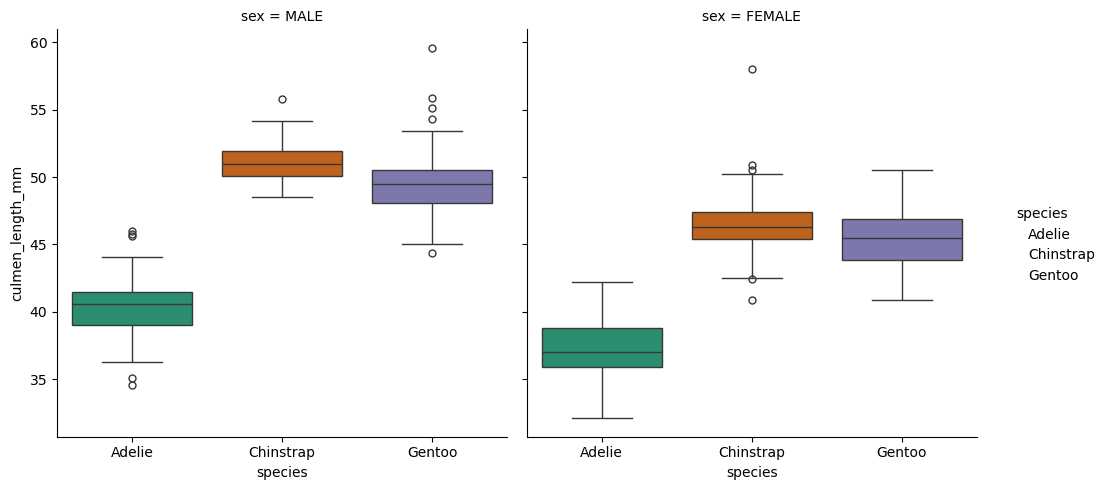

In [16]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.catplot(x='species',y='culmen_length_mm',data=df,kind='box',col='sex',palette='Dark2')

## Feature Engineering

pd.get_dummies(df) -> converting categorical variables into dummy/indicator variables (also known as one-hot encoding). 

For each categorical variable, it creates new columns representing each unique category within that variable.

Binary Encoding: Each of these new columns (dummy variables) corresponds to one category and will have binary values: 1 if the original row belonged to that category, and 0 otherwise.

Dimentionality Increase issue: One-hot encoding can significantly increase the number of features in your dataset, especially if the categorical variables have many categories. This can lead to issues with model complexity and computational efficiency, known as the "curse of dimensionality".

In [17]:
pd.get_dummies(df)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,True,False,False,False,False,True,False,True
1,39.5,17.4,186.0,3800.0,True,False,False,False,False,True,True,False
2,40.3,18.0,195.0,3250.0,True,False,False,False,False,True,True,False
4,36.7,19.3,193.0,3450.0,True,False,False,False,False,True,True,False
5,39.3,20.6,190.0,3650.0,True,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,True,True,False,False,True,False
340,46.8,14.3,215.0,4850.0,False,False,True,True,False,False,True,False
341,50.4,15.7,222.0,5750.0,False,False,True,True,False,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,True,True,False,False,True,False


In [18]:
pd.get_dummies(df.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True,True
1,39.5,17.4,186.0,3800.0,False,True,False
2,40.3,18.0,195.0,3250.0,False,True,False
4,36.7,19.3,193.0,3450.0,False,True,False
5,39.3,20.6,190.0,3650.0,False,True,True
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,False,False,False
340,46.8,14.3,215.0,4850.0,False,False,False
341,50.4,15.7,222.0,5750.0,False,False,True
342,45.2,14.8,212.0,5200.0,False,False,False


## Train | Test Split

In [19]:
X = pd.get_dummies(df.drop('species',axis=1),drop_first=True)
y = df['species']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Decision Tree Classifier

## Default Hyperparameters

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
model = DecisionTreeClassifier()

In [24]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
base_pred = model.predict(X_test)

## Evaluation

In [26]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [27]:
confusion_matrix(y_test,base_pred)

array([[38,  2,  0],
       [ 5, 22,  0],
       [ 1,  0, 32]])

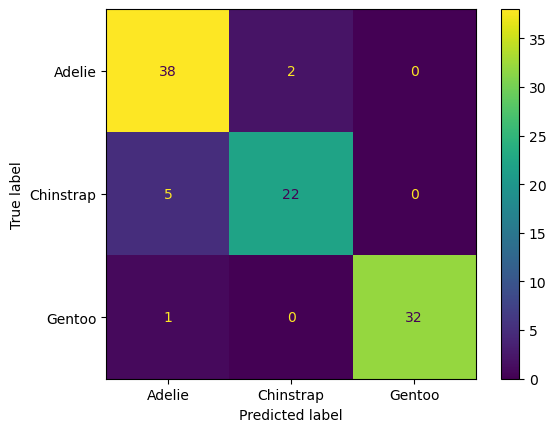

In [28]:
plot_confusion_matrix(model,X_test,y_test)

In [29]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

      Adelie       0.86      0.95      0.90        40
   Chinstrap       0.92      0.81      0.86        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.92      0.92      0.92       100



In [30]:
model.feature_importances_

array([0.33350103, 0.02010577, 0.58261583, 0.        , 0.03806069,
       0.        , 0.02571668])

In [31]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
culmen_length_mm,0.333501
culmen_depth_mm,0.020106
flipper_length_mm,0.582616
body_mass_g,0.000000
island_Dream,0.038061
island_Torgersen,0.000000
sex_MALE,0.025717


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

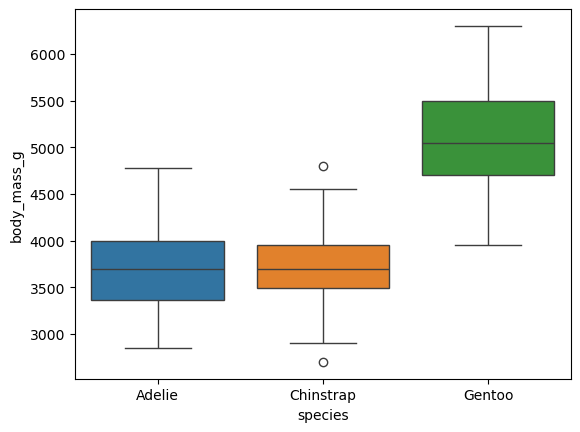

In [33]:
sns.boxplot(x='species',y='body_mass_g',data=df, hue = 'species')

## Visualize the Tree

Online Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

In [34]:
from sklearn.tree import plot_tree

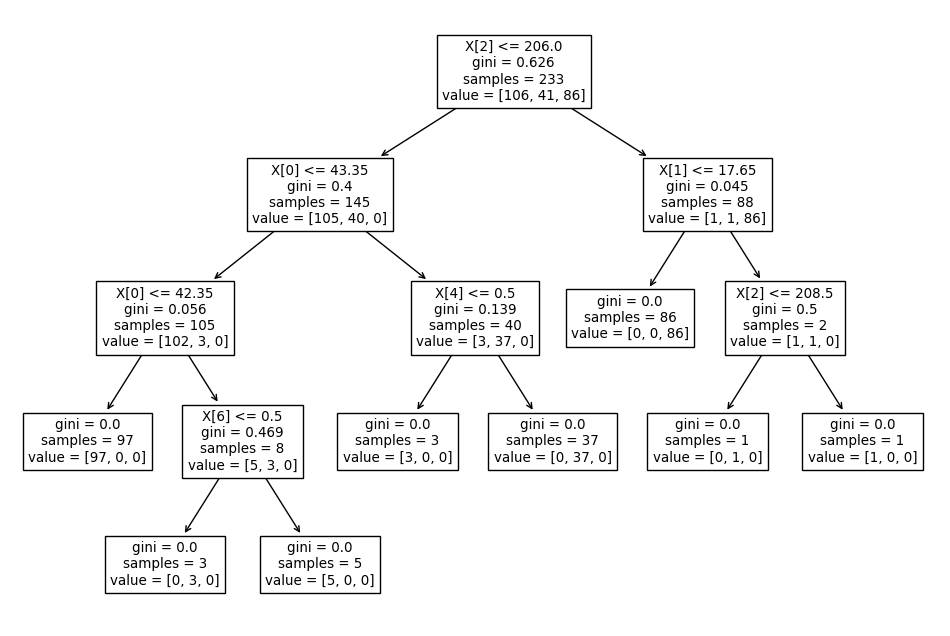

In [35]:
plt.figure(figsize=(12,8))
plot_tree(model);

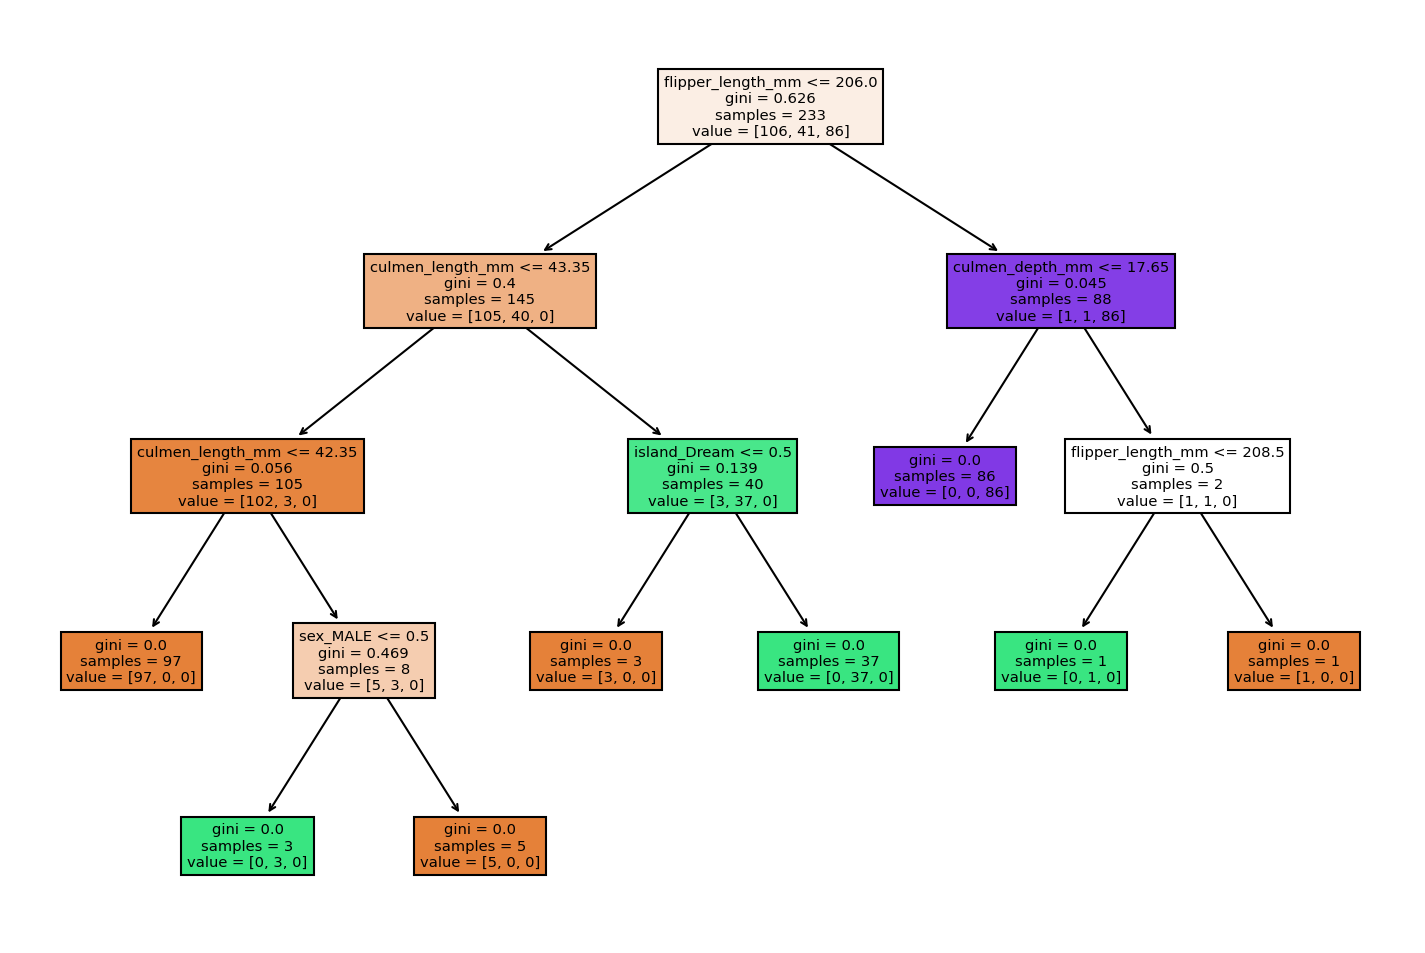

In [36]:
# For better visualization, used features_name & color 

plt.figure(figsize=(12,8),dpi=150)
plot_tree(model,filled=True,feature_names=X.columns);

## Reporting Model Results

A function that reports back classification results and plots out the tree

In [37]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);

## Understanding Hyperparameters

### Max Depth

In [38]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [39]:
pruned_tree = DecisionTreeClassifier(max_depth=2)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100





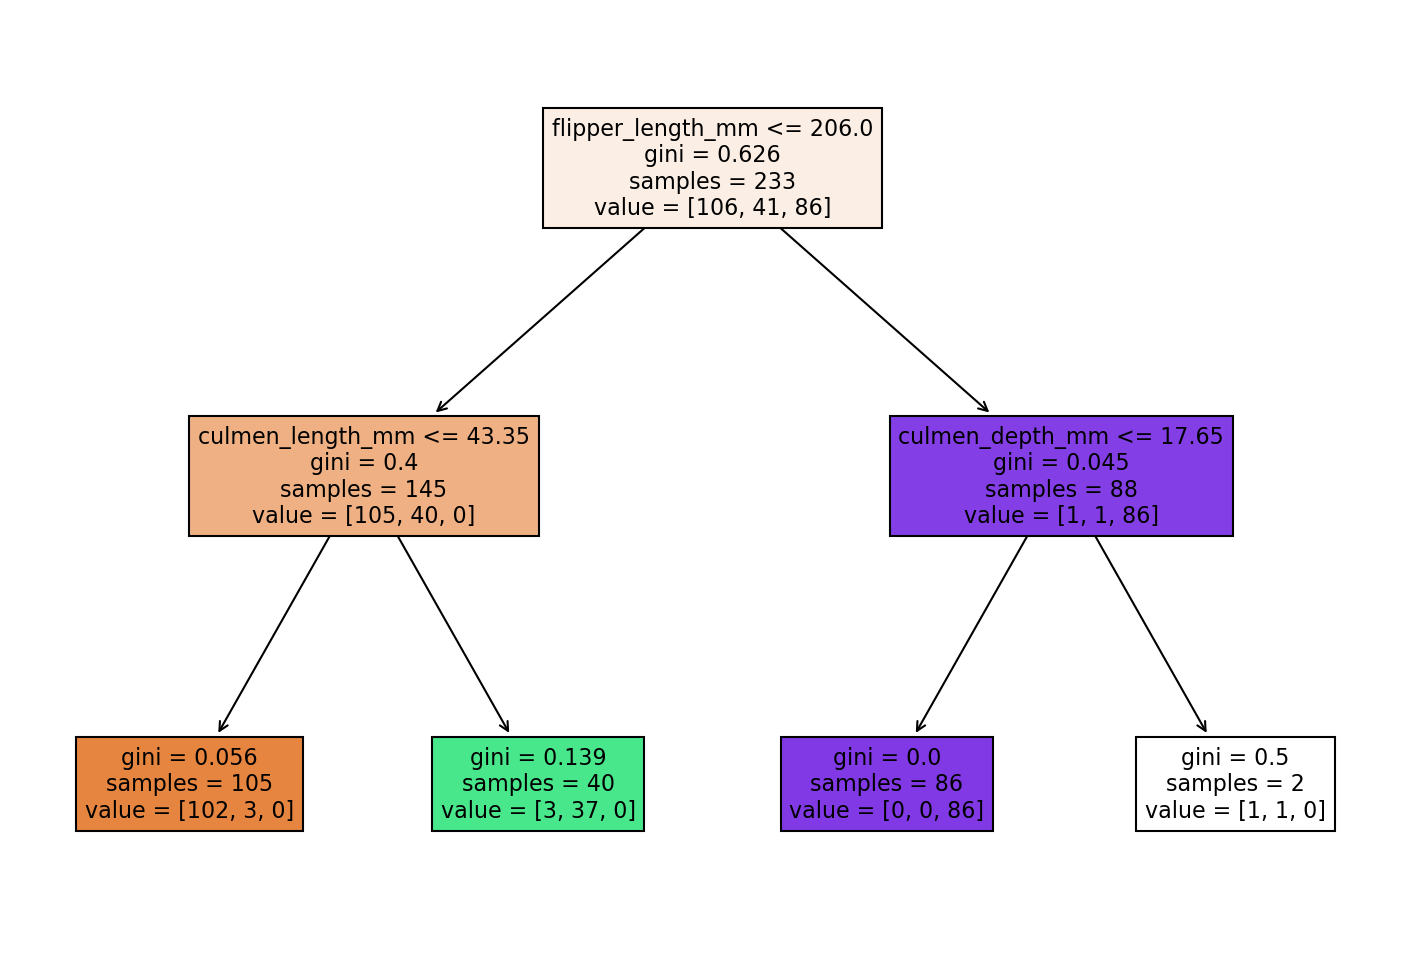

In [40]:
report_model(pruned_tree)

### Max Leaf Nodes

In [41]:
pruned_tree = DecisionTreeClassifier(max_leaf_nodes=3)
pruned_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100





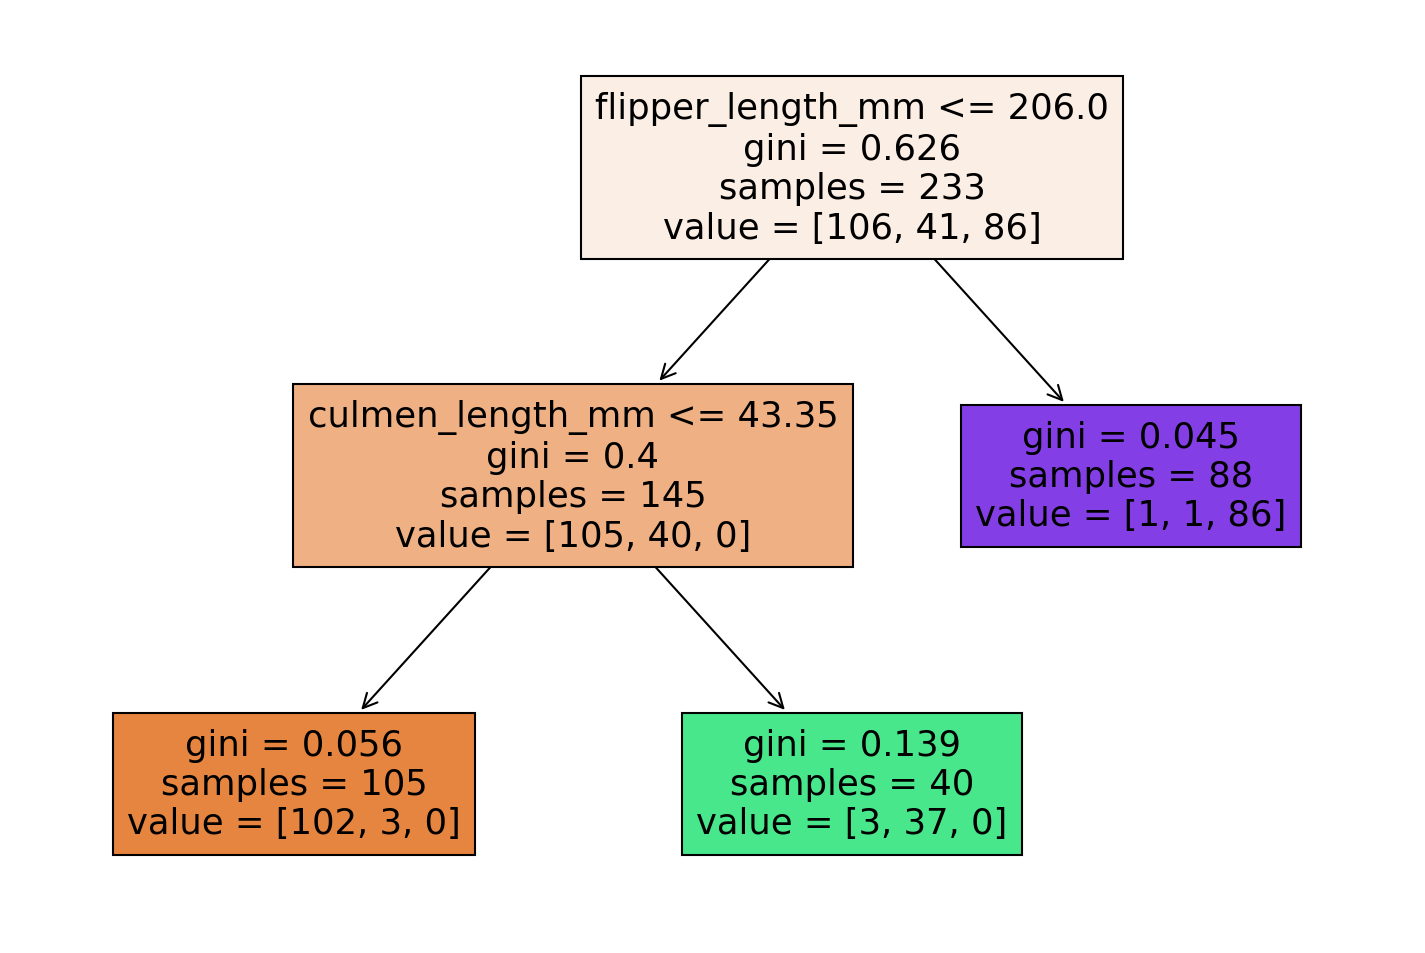

In [42]:
report_model(pruned_tree)

### Criterion

Criterion -> how the decision tree decides to split the data at each node. 

Gini index (measures of impurity) and entropy (measures of disorder)

These criteria help in determining how a decision tree can most effectively split the data.

**Gini Index**

-> measures the frequency at which any element of the dataset will be mislabeled when it is randomly labeled according to the distribution of labels in the dataset.

Calculation: For a set S, the Gini impurity is calculated as **1 - sum(p_i^2)**, where p_i is the probability of an item being classified into class i. 

Interpretation: A Gini index of 0 means perfect purity. A higher Gini index implies a higher level of disorder and a mixture of classes in the subset.

Usage in Decision Trees: When using the Gini index, the decision tree algorithm will attempt to partition the data in a way that decreases the Gini impurity the most in the child nodes.

**Entropy**

-> measures the level of uncertainty or disorder in the data. It's used to quantify the impurity or randomness in the dataset.

Calculation: For a set S, entropy is calculated as **- sum(p_i * log2(p_i))**, where p_i is the probability of an item being classified into class i.

Interpretation: An entropy of 0 indicates complete certainty (all elements belong to a single class). Higher entropy values indicate higher disorder or more mixed classes.

Usage in Decision Trees: When using entropy as a criterion, the decision tree will make splits that aim to decrease the entropy (or increase the information gain) in the child nodes. Information gain is essentially the difference in entropy before and after the split.

Computational Efficiency: Gini impurity is computationally less intensive because it does not require calculating logarithmic functions. Therefore, it's slightly faster, especially on large datasets.

Consistency vs. Homogeneity: While both aim to achieve homogeneity in nodes, entropy might lead to slightly more balanced trees due to its logarithmic nature.

Ultimately, the choice between Gini impurity and entropy often comes down to personal preference or specific requirements of the problem at hand. In many cases, the default criterion (Gini index in scikit-learn's DecisionTreeClassifier) is sufficient.

In [44]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')
entropy_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

              precision    recall  f1-score   support

      Adelie       0.91      0.97      0.94        40
   Chinstrap       0.96      0.89      0.92        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.95       100
   macro avg       0.96      0.94      0.95       100
weighted avg       0.95      0.95      0.95       100





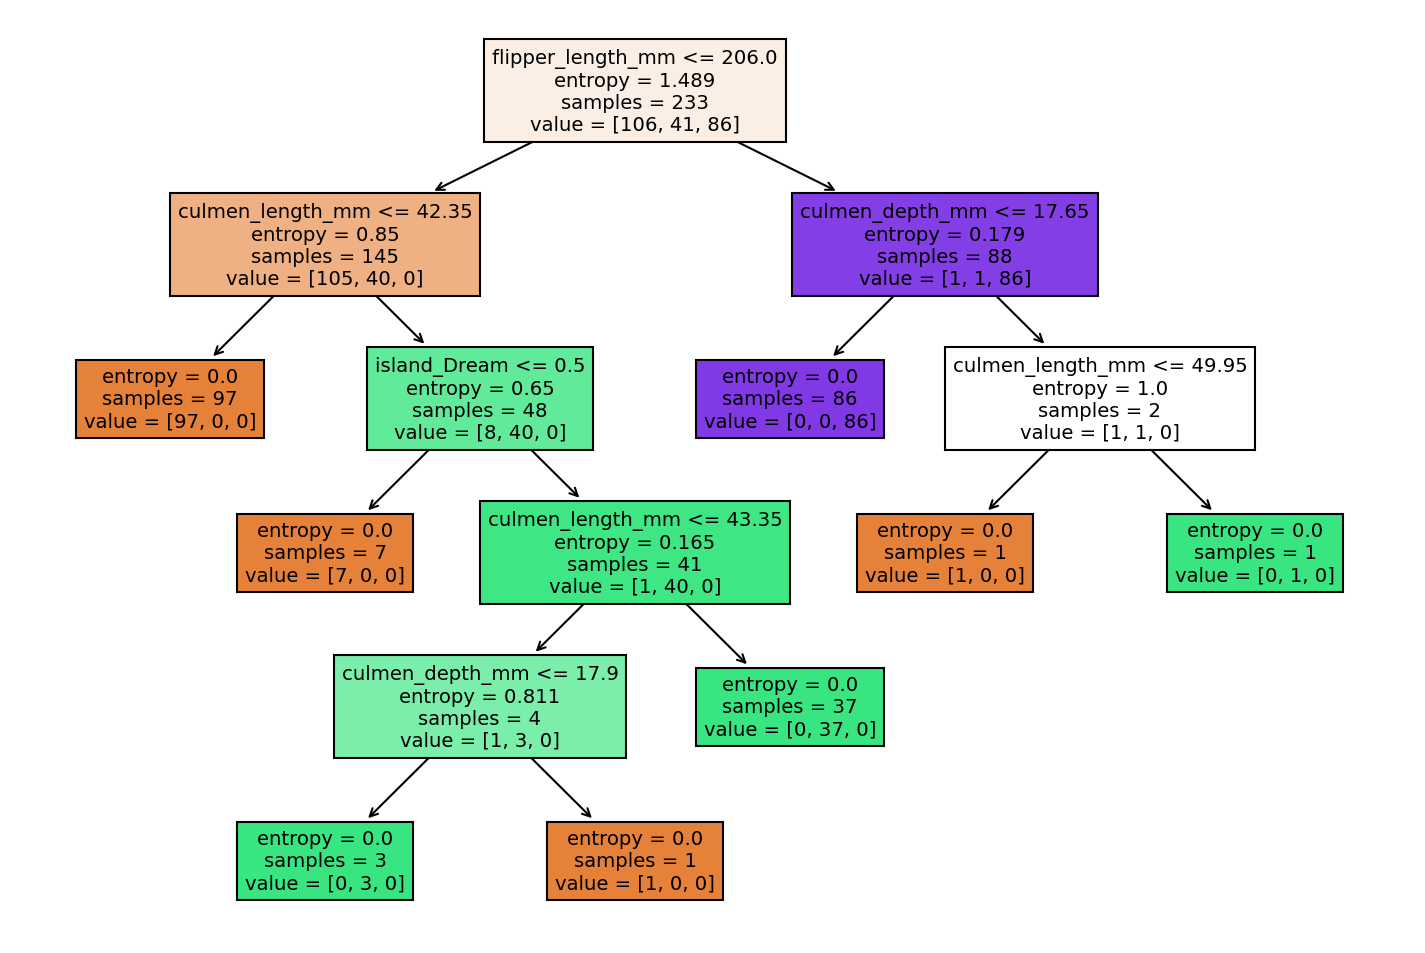

In [45]:
report_model(entropy_tree)

# Decision Trees - Regression

In [46]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
import pandas as pd
import numpy as np

# Create a simple dataset
np.random.seed(0)
X = np.random.rand(100, 2)  # 100 samples and 2 features
y = X[:, 0] + 2 * X[:, 1] + np.random.normal(0, 0.1, 100)  # Target variable with some noise

# Convert to a DataFrame
df_regression = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df_regression['Target'] = y

# Display the first few rows of the DataFrame
print(df_regression.head())

   Feature1  Feature2    Target
0  0.548814  0.715189  2.091856
1  0.602763  0.544883  1.584537
2  0.423655  0.645894  1.600696
3  0.437587  0.891773  2.177351
4  0.963663  0.383442  1.680743


### 1. Prepare Your Data

In [48]:
# Example using a hypothetical DataFrame 'df'
X = df_regression.drop('Target', axis=1)  # Features
y = df_regression['Target']               # Target variable

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 2. Create and Fit the Model

In [49]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### 3. Make Predictions

In [50]:
y_pred = regressor.predict(X_test)

### 4. Evaluate the Model

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2_percentage = r2 * 100

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)
print("R-squared Percentage:", r2_percentage, "%")


Mean Squared Error: 0.053814064957928356
R^2 Score: 0.8891639284549602
R-squared Percentage: 88.91639284549602 %


### 5. Visualize the Tree (Optional)

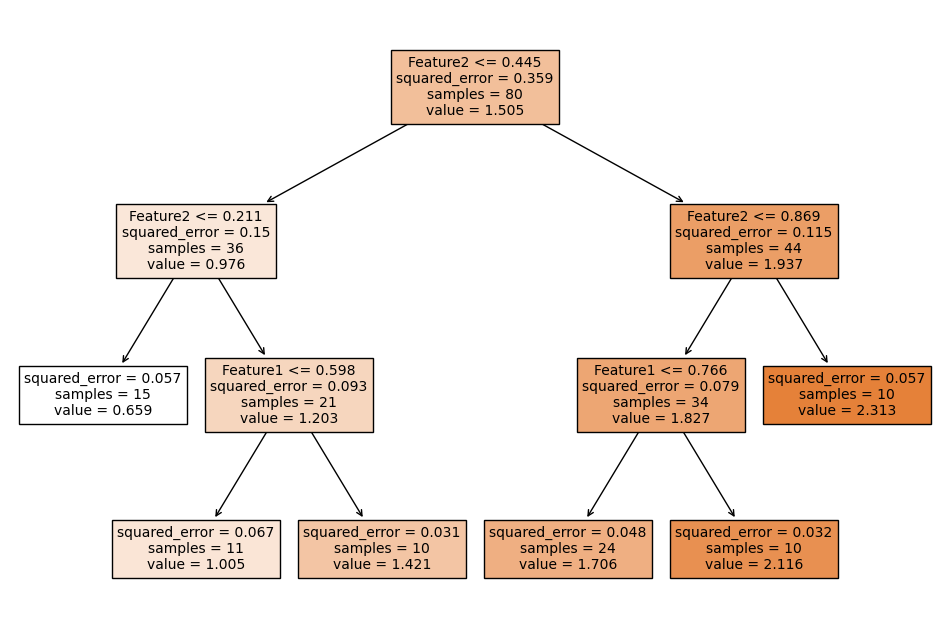

In [55]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import tree

# Adjust these parameters to simplify the tree
regressor = DecisionTreeRegressor(max_depth=3, min_samples_split=20, min_samples_leaf=10)
regressor.fit(X_train, y_train)

# Visualize the simplified tree
plt.figure(figsize=(12, 8))
tree.plot_tree(regressor, filled=True, feature_names=X_train.columns, fontsize=10)
plt.show()
